In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 16})

Here we perform an EDA analysis o global tree cover loss, examining patterns and drivers of tree cover loss from 2005 to 2024.

Our question here is to comparisom between two decades: 2005-2014 and 2015-2024.

## Load the data

In [ ]:
#### Load the data
### The data source : https://www.globalforestwatch.org/dashboards/global/?category=land-cover&location=WyJnbG9iYWwiXQ%3D%3D 

csv_file_path = 'drivers_clean.csv'
df_drivers = pd.read_csv(csv_file_path)

df_drivers.head()

,Unnamed: 0,country,threshold,driver,year,tc_loss_ha,area_ha,extent_2000_ha,extent_2010_ha
0,0,Afghanistan,30,Hard commodities,2014,0.0,64383655.0,205771.0,71786.0
1,1,Afghanistan,30,Logging,2001,3.0,64383655.0,205771.0,71786.0
2,2,Afghanistan,30,Logging,2002,64.0,64383655.0,205771.0,71786.0
3,3,Afghanistan,30,Logging,2003,73.0,64383655.0,205771.0,71786.0
4,4,Afghanistan,30,Logging,2004,143.0,64383655.0,205771.0,71786.0


In [5]:
#### Check the variables and the missing values
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21897 entries, 0 to 21896
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21897 non-null  int64  
 1   country         21897 non-null  object 
 2   threshold       21897 non-null  int64  
 3   driver          21897 non-null  object 
 4   year            21897 non-null  int64  
 5   tc_loss_ha      21897 non-null  float64
 6   area_ha         21896 non-null  float64
 7   extent_2000_ha  21896 non-null  float64
 8   extent_2010_ha  21896 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.5+ MB


In [6]:
# Check the missing values
df_drivers.isna().sum()

Unnamed: 0        0
country           0
threshold         0
driver            0
year              0
tc_loss_ha        0
area_ha           1
extent_2000_ha    1
extent_2010_ha    1
dtype: int64

## Univariate on country

In [ ]:
## Unique countries
df_drivers.country.unique()

## number of unique countries
df_drivers.country.nunique()

158

In [9]:
## The freqeuncy of countries in the dataset
df_drivers.country.value_counts().sort_values().head(10)

country
Micronesia                   1
S√£o Tom√© and Pr√≠ncipe     1
Niger                        5
Malta                        7
Jordan                      10
Eritrea                     10
Mauritania                  20
Palestine                   42
Sudan                       45
Iraq                        50
Name: count, dtype: int64

## Univariate of the year

In [10]:
## Unique years
df_drivers.year.unique()

## number of unique countries
df_drivers.year.nunique()

24

In [69]:
## The freqiency of years in the dataset
df_drivers.year.value_counts().round(2) ## The change here is explained that the drivers are not the same for al the countries

year
2001    932
2012    932
2004    931
2008    929
2002    928
2006    927
2005    926
2007    926
2010    926
2009    925
2014    923
2003    922
2013    919
2011    916
2024    914
2023    908
2021    899
2017    898
2019    896
2022    894
2018    892
2020    892
2016    883
2015    859
Name: count, dtype: int64

## Univariate of driver

In [70]:
## Unique drivers
df_drivers.driver.unique()
# df_drivers.driver.nunique()

array(['Hard commodities', 'Logging', 'Other natural disturbances',
       'Permanent agriculture', 'Settlements & Infrastructure',
       'Wildfire', 'Shifting cultivation'], dtype=object)

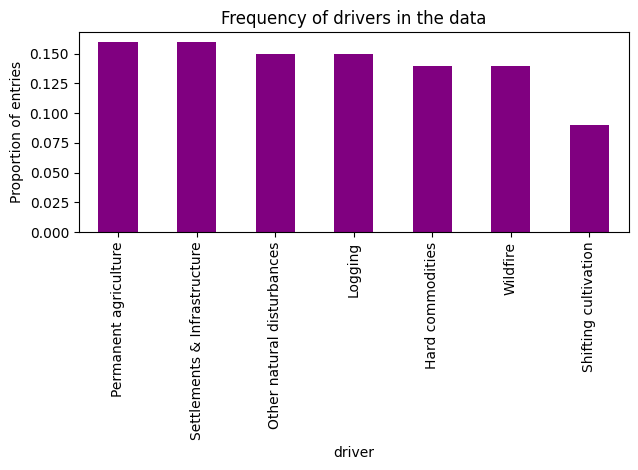

In [12]:
## the most frequent drivers entries for all years for all countries
df_drivers.driver.value_counts() 
df_drivers.driver.value_counts(normalize=True).round(2).sort_values(ascending=False).plot(kind='bar', color='Purple')

plt.ylabel('Proportion of entries')
plt.title('Frequency of drivers in the data')
plt.tight_layout()
plt.show()

## Devide decades

In [14]:
### Split the data based on the decade periods
df_drivers_decade_1 = df_drivers[(df_drivers.year>2004) & (df_drivers.year<=2014)]
df_drivers_decade_2 = df_drivers[(2014<df_drivers.year)]

## Univariate of countries for both decades

In [ ]:
#### the unique countries for each subset 
print('The number of unique countries for the first decade is {}'.format(df_drivers_decade_1.country.nunique()))
print('The number of unique countries for the second decade is {}'.format(df_drivers_decade_2.country.nunique()))
print('The number of unique countries of all the dataset is {}'.format(df_drivers.country.nunique()))

## >> there is a difference in 3 countries >> we will take the intersection of countries

The number of unique countries for the first decade is 156
The number of unique countries for the second decade is 155
The number of unique countries of all the dataset is 158


In [30]:
#### Take the intersection of coutries
intersec_countries = list(set(list(df_drivers_decade_1.country.unique())).intersection(set(list(df_drivers_decade_2.country.unique()))))

### select the common countries fro each decade
df_drivers_decade_1 = df_drivers_decade_1[df_drivers_decade_1.country.isin(intersec_countries)]
df_drivers_decade_2 = df_drivers_decade_2[df_drivers_decade_2.country.isin(intersec_countries)]

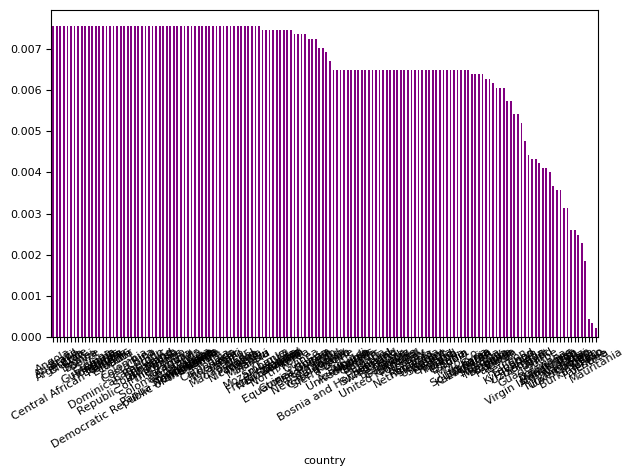

In [36]:
## Frequency of countries in seperate decades 
## Decade 1
plt.rcParams.update({'font.size': 8})

count_country_drivers_1 = df_drivers_decade_1.country.value_counts(normalize=True)
count_country_drivers_1.plot(kind='bar', color='Purple')

plt.xticks(rotation=30)  # Rotate x-axis labels
plt.tight_layout()       # Prevent label cutoff
plt.show()

### With this we can say either not all drivers are covered or that not all years are included!!

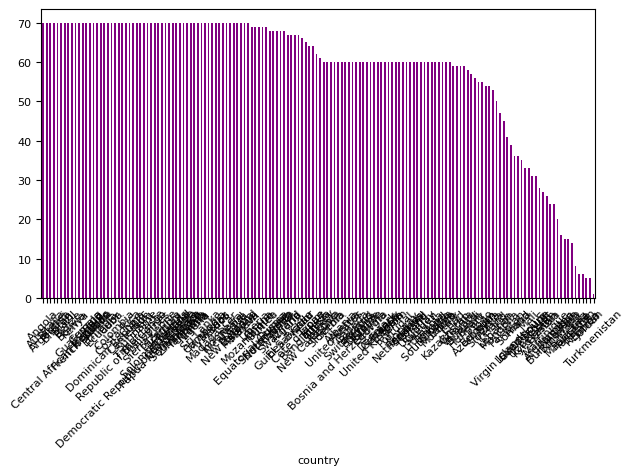

In [37]:
## Frequency of countries in seperate decades 
## Decade 2

plt.rcParams.update({'font.size': 8
                     })
count_country_drivers_2 = df_drivers_decade_2.country.value_counts()
count_country_drivers_2.plot(kind='bar', color='Purple')

plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Prevent label cutoff
plt.show()

### With this we can say either not all drivers are covered or that not all years are included!!

## Unvariate of drivers for both decades

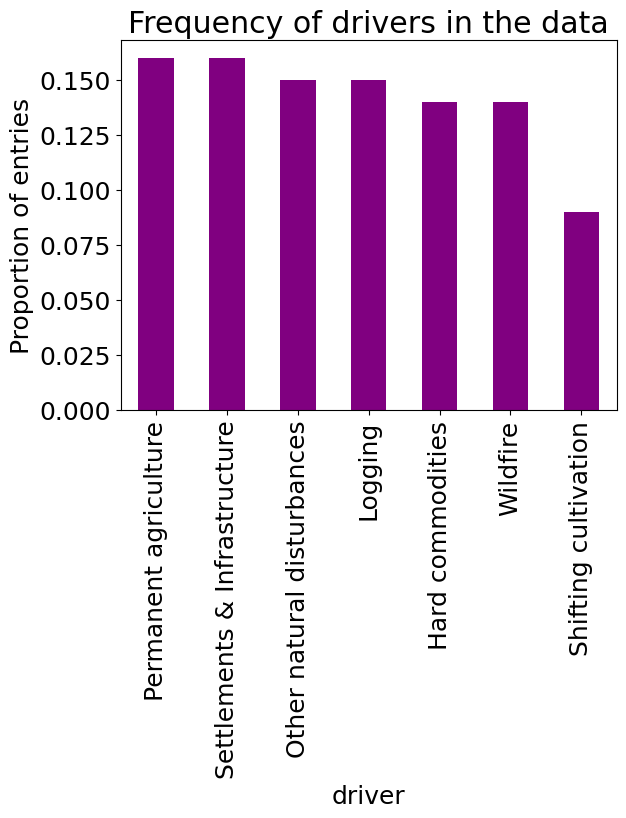

In [43]:
## the most frequent drivers entries for all years for all countries
plt.rcParams.update({'font.size': 18})

df_drivers_decade_1.driver.value_counts(normalize=True).round(2).sort_values(ascending=False).plot(kind='bar', color='Purple')

plt.title('Frequency of drivers in the data')
plt.ylabel('Proportion of entries')
plt.tight_layout()
plt.show()

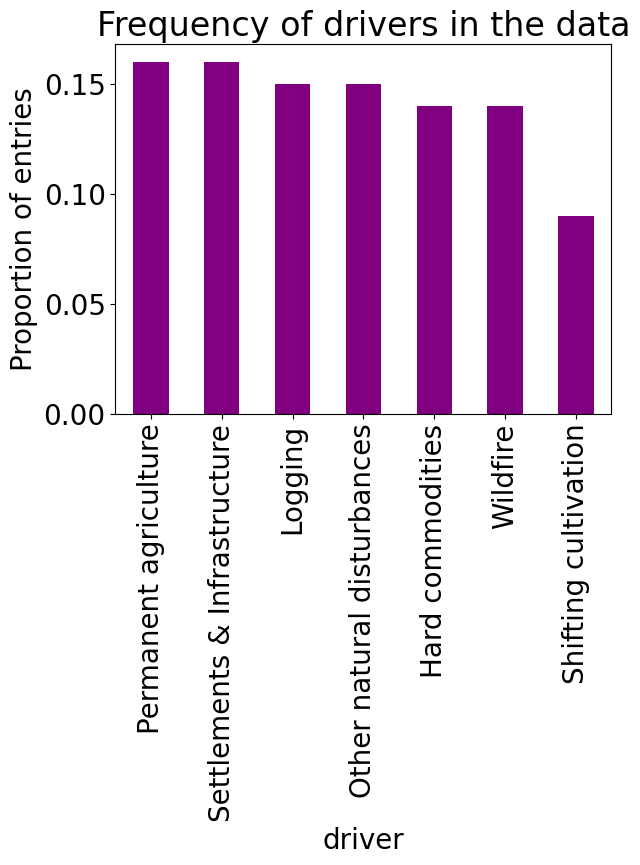

In [48]:
## the most frequent drivers entries for all years for all countries
plt.rcParams.update({'font.size': 20})
df_drivers_decade_2.driver.value_counts(normalize=True).round(2).sort_values(ascending=False).plot(kind='bar', color='Purple')

plt.title('Frequency of drivers in the data')
plt.ylabel('Proportion of entries')
plt.tight_layout()
plt.show()

## Bivariate year and country

In [56]:
## check for all the coutries the available years!! First decade
df_drivers_decade_1.groupby("country", dropna=False)["year"].nunique().unique() ### 

summary = (
    df_drivers_decade_1
    .groupby("country", dropna=False)["year"]
    .agg(
        unique_years=lambda x: sorted(x.unique()),
        num_years="nunique"
    )
    .reset_index()
)

countries_lt_9_years = summary[summary["num_years"] < 10]
countries_lt_9_years.sort_values(by='num_years', ascending=False)

,country,unique_years,num_years
114,Réunion,"[2005, 2006, 2008, 2009, 2010, 2011, 2012, 201...",9
102,Palestine,"[2005, 2006, 2007, 2008, 2009, 2010, 2012, 201...",9
70,Jordan,"[2006, 2007, 2010, 2014]",4
42,Eritrea,"[2012, 2014]",2
86,Mauritania,"[2012, 2013]",2


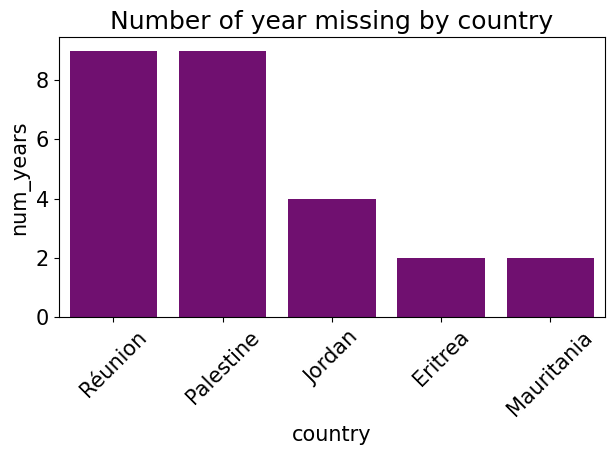

In [57]:
plt.rcParams.update({'font.size': 15})

sns.barplot(data=countries_lt_9_years.sort_values(by='num_years', ascending=False), x='country', y='num_years', color='Purple')

plt.title('Number of year missing by country')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Prevent label cutoff
plt.show()

In [58]:
## check for all the coutries the available years!! First decade

summary = (
    df_drivers_decade_2
    .groupby("country", dropna=False)["year"]
    .agg(
        unique_years=lambda x: sorted(x.unique()),
        num_years="nunique"
    )
    .reset_index()
)

countries_lt_9_years = summary[summary["num_years"] < 10]
countries_lt_9_years

,country,unique_years,num_years
0,Afghanistan,"[2018, 2019, 2020, 2021, 2022, 2023, 2024]",7
42,Eritrea,"[2017, 2021, 2022, 2023, 2024]",5
65,Iran,"[2016, 2017, 2018, 2019, 2020, 2021, 2022, 202...",9
66,Iraq,"[2016, 2017, 2023, 2024]",4
70,Jordan,"[2017, 2019, 2020, 2023, 2024]",5
74,Kyrgyzstan,"[2016, 2017, 2018, 2019, 2020, 2021, 2022, 202...",9
86,Mauritania,"[2018, 2019, 2020, 2021, 2022, 2023, 2024]",7
101,Pakistan,"[2015, 2017, 2018, 2019, 2020, 2021, 2022, 202...",9
102,Palestine,"[2016, 2017, 2018, 2019, 2020, 2023, 2024]",7
114,Réunion,"[2015, 2016]",2


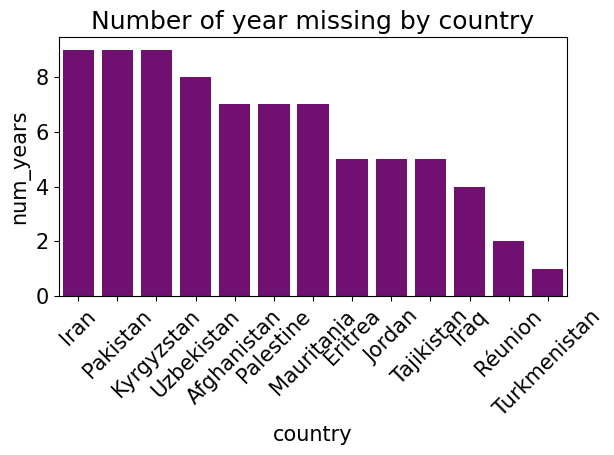

In [59]:
plt.rcParams.update({'font.size': 15})

sns.barplot(data=countries_lt_9_years.sort_values(by='num_years', ascending=False), x='country', y='num_years', color='Purple')

plt.title('Number of year missing by country')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Prevent label cutoff
plt.show()

-- insights 
- for both decades not all countries covers the full period >> there are some missing years
- For this reason we for a first step we will calculaet the avg instead of the tc_loss instead of the sum!!

## Univariate tc_loss_ha

In [ ]:
round((df_drivers_decade_1.tc_loss_ha.describe()), 2)

## This is the tc_loss_ha for all countries by drivers >> there is a huge difference in the values >> they should be aggregated by drives

count       9244.00
mean       20819.76
std       144123.03
min            0.00
25%           25.75
50%          219.00
75%         2115.50
max      4308706.00
Name: tc_loss_ha, dtype: float64

In [61]:
round((df_drivers_decade_2.tc_loss_ha.describe()), 2)

count       8930.00
mean       28967.50
std       201636.25
min            0.00
25%           33.00
50%          313.50
75%         3366.50
max      7789588.00
Name: tc_loss_ha, dtype: float64

In [ ]:
# Aggregate by country and year
country_decade_total_1 = df_drivers_decade_1.groupby(['country','year'])['tc_loss_ha'].sum().reset_index()

# Aggregate by country and calculate the mean for the loss for the available years >> This calculates the average by years
avg_loss_country_decade1 = country_decade_total_1.groupby(['country'])['tc_loss_ha'].mean().reset_index()
avg_loss_country_decade1

,country,tc_loss_ha
0,Afghanistan,92.2
1,Albania,2414.2
2,Algeria,7118.8
3,Angola,146834.5
4,Argentina,399919.5
...,...,...
149,Vietnam,133918.3
150,"Virgin Islands, U.S.",35.9
151,Zambia,89003.2
152,Zimbabwe,10825.6


In [112]:
### >> For the frist decade there was no 30% dense forest area that was lost >> one interprtation could be that the dense forest with our definition do not exist in the country anymore
avg_loss_country_decade1[avg_loss_country_decade1.tc_loss_ha==0.0]

,country,tc_loss_ha
42,Eritrea,0.0
70,Jordan,0.0
86,Mauritania,0.0


Text(0.5, 0, 'avg-tc-loss (ha)')

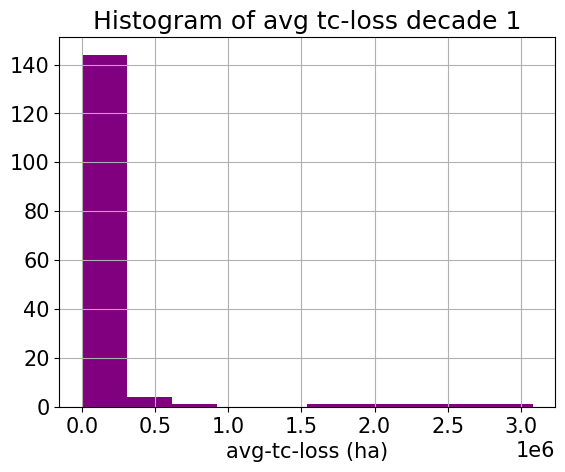

In [70]:
avg_loss_country_decade1.tc_loss_ha.hist(color='purple')

plt.title('Histogram of avg tc-loss decade 1')
plt.xlabel('avg-tc-loss (ha)')

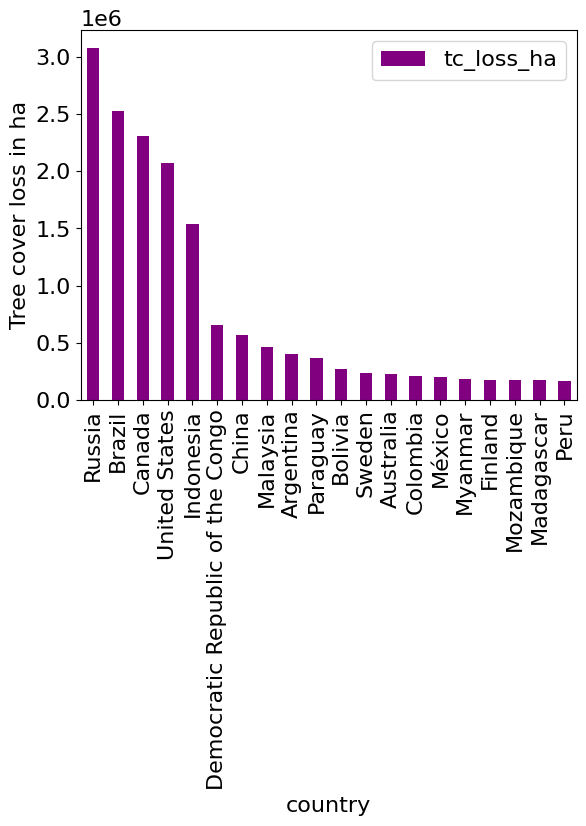

In [ ]:
### 2005 -2014
plt.rcParams.update({'font.size': 16})

avg_loss_country_decade1.sort_values(by='tc_loss_ha', ascending=False).head(20).plot(kind='bar', x='country', y='tc_loss_ha', color='Purple')

plt.ylabel('Tree cover loss in ha')
# plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()       # Prevent label cutoff
plt.show()

## >> Three countries have average of tc-loss higher than 3M ha during the first decade >> R, B and Canada
## three have loss average between 1 and 3 >> US, Indo, congo
## All the rest has lower than 1 Mha

In [ ]:
### Statistics by countries for decade 1##
print('The mean of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade1.tc_loss_ha.mean()),2)))
print('The median of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade1.tc_loss_ha.median()),2)))
print('The mode of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade1.tc_loss_ha.mode()),2)))
print('The std of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade1.tc_loss_ha.std()),2)))

Q1 = round(float(avg_loss_country_decade1.tc_loss_ha.quantile(0.25)),2)
Q3 = round(float(avg_loss_country_decade1.tc_loss_ha.quantile(0.75)),2)
IQR = Q3 -Q1

print('The IQR of the avg yearly loss by coutries {}'.format(round(float(IQR),2)))


### here the values are float mostly unique values BUT we have four zero values of 4 cout
## median < mean
## std is higher than IQR >> Extreme values in the data

The mean of the avg yearly loss by coutries 124972.97
The median of the avg yearly loss by coutries 12237.89
The mode of the avg yearly loss by coutries 0.0
The std of the avg yearly loss by coutries 423493.09
The IQR of the avg yearly loss by coutries 59393.18


In [85]:
## 2015-2024
# Aggregate by country
country_decade_total_2 = df_drivers_decade_2.groupby(['country','year'])['tc_loss_ha'].sum().reset_index()

# Aggregate by country and calculate the mean for the loss for the available years
avg_loss_country_decade2 = country_decade_total_2.groupby(['country'])['tc_loss_ha'].mean().reset_index()
avg_loss_country_decade2

,country,tc_loss_ha
0,Afghanistan,16.571429
1,Albania,1413.600000
2,Algeria,14498.300000
3,Angola,244973.800000
4,Argentina,200938.900000
...,...,...
149,Vietnam,212882.100000
150,"Virgin Islands, U.S.",129.300000
151,Zambia,162090.100000
152,Zimbabwe,10181.200000


In [90]:
avg_loss_country_decade2[avg_loss_country_decade2.tc_loss_ha==0.0]

,country,tc_loss_ha
20,Burkina Faso,0.0
42,Eritrea,0.0
86,Mauritania,0.0
140,Turkmenistan,0.0


Text(0.5, 0, 'avg-tc-loss (ha)')

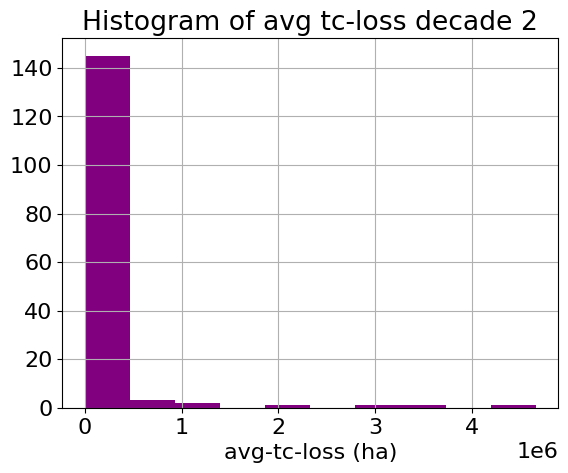

In [87]:
avg_loss_country_decade2.tc_loss_ha.hist(color='purple')

plt.title('Histogram of avg tc-loss decade 2')
plt.xlabel('avg-tc-loss (ha)')

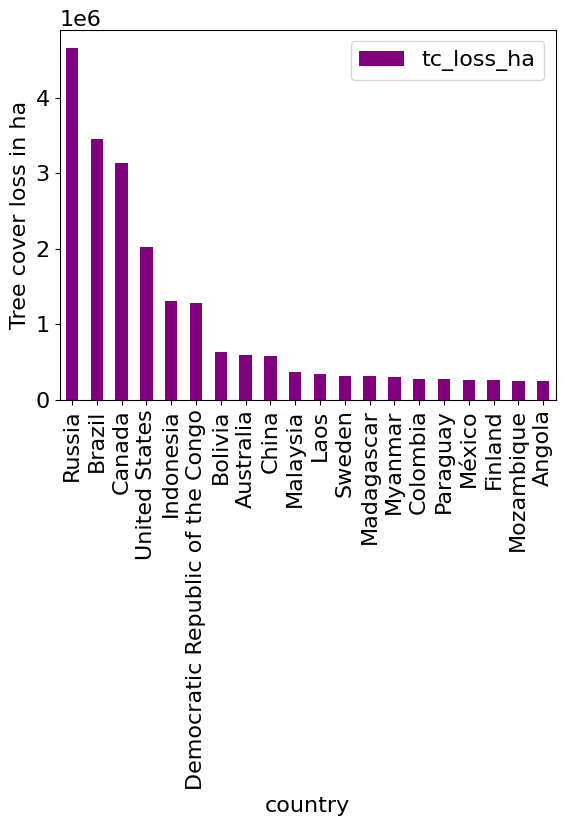

In [79]:
### 
plt.rcParams.update({'font.size': 16})

avg_loss_country_decade2.sort_values(by='tc_loss_ha', ascending=False).head(20).plot(kind='bar', x='country', y='tc_loss_ha', legend=True, color='Purple')

plt.ylabel('Tree cover loss in ha')
plt.tight_layout()       # Prevent label cutoff
plt.show()

## >> The same pattern for the second decade is observed where the 5 highest impacting countries ae the same and wit the same order of influence
## The general values decreased

In [ ]:
### Statistics by countries for decade 2##
print('The mean of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade2.tc_loss_ha.mean()),2)))
print('The median of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade2.tc_loss_ha.median()),2)))
# print('The mode of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade2.tc_loss_ha.mode()),2)))
print('The std of the avg yearly loss by coutries {}'.format(round(float(avg_loss_country_decade2.tc_loss_ha.std()),2)))

Q1 = round(float(avg_loss_country_decade2.tc_loss_ha.quantile(0.25)),2)
Q3 = round(float(avg_loss_country_decade2.tc_loss_ha.quantile(0.75)),2)
IQR = Q3 -Q1

print('The IQR of the avg yearly loss by coutries {}'.format(round(float(IQR),2)))

The mean of the avg yearly loss by coutries 167974.08
The median of the avg yearly loss by coutries 16526.3
The std of the avg yearly loss by coutries 567465.14
The IQR of the avg yearly loss by coutries 93615.9


## Analysis 5 Important countries 

In [92]:
### 5 Top countries 
high_ts_loss_countries = list(avg_loss_country_decade2.sort_values(by='tc_loss_ha', ascending=False).head(5).country)
high_ts_loss_countries

['Russia', 'Brazil', 'Canada', 'United States', 'Indonesia']

In [ ]:
# Prepare data by country and drivers to plot the stacked bar plot
top5C_drivers_decade_1 = df_drivers_decade_1[df_drivers_decade_1.country.isin(high_ts_loss_countries)].groupby(['country', 'driver'])['tc_loss_ha'].sum().reset_index()

plot_df1 = pd.crosstab(index=top5C_drivers_decade_1.country, columns=top5C_drivers_decade_1.driver, values=top5C_drivers_decade_1.tc_loss_ha, aggfunc="sum")

plot_df1 = plot_df1.loc[
    plot_df1.sum(axis=1).sort_values(ascending=False).index
]
plot_df1.fillna(0) ## fill Nan values by zeros!!!

driver,Hard commodities,Logging,Other natural disturbances,Permanent agriculture,Settlements & Infrastructure,Shifting cultivation,Wildfire
country,,,,,,,
Russia,300641.0,7763609.0,262348.0,20840.0,54921.0,11.0,22427516.0
Brazil,133118.0,2765585.0,291069.0,20238592.0,97106.0,546959.0,1242328.0
Canada,154400.0,7907642.0,498515.0,157796.0,72725.0,0.0,14320130.0
United States,158310.0,13456409.0,412192.0,972336.0,706091.0,0.0,5029121.0
Indonesia,320260.0,1697184.0,102754.0,11985309.0,57758.0,627105.0,640943.0


In [ ]:
# Prepare data by country and drivers to plot the stacked bar plot

#### The same for the second decade ##
top5C_drivers_decade_2 = df_drivers_decade_2[df_drivers_decade_2.country.isin(high_ts_loss_countries)].groupby(['country', 'driver'])['tc_loss_ha'].sum().reset_index()

plot_df2 = pd.crosstab(index=top5C_drivers_decade_2.country, columns=top5C_drivers_decade_2.driver, values=top5C_drivers_decade_2.tc_loss_ha, aggfunc="sum")

plot_df2 = plot_df2.loc[
    plot_df2.sum(axis=1).sort_values(ascending=False).index
]

plot_df2.fillna(0) ## fill Nan values by zeros!!!

driver,Hard commodities,Logging,Other natural disturbances,Permanent agriculture,Settlements & Infrastructure,Shifting cultivation,Wildfire
country,,,,,,,
Russia,466335.0,9833352.0,1671950.0,16845.0,40697.0,9.0,34620523.0
Brazil,281755.0,2487881.0,442853.0,21997216.0,71167.0,871880.0,8352115.0
Canada,103959.0,8204824.0,258302.0,183109.0,59547.0,0.0,22614812.0
United States,115581.0,11941342.0,213351.0,641111.0,583420.0,0.0,6733737.0
Indonesia,342153.0,1178817.0,134774.0,8989689.0,50926.0,922177.0,1432280.0


In [ ]:
#### For visualisation
# ---- Make sure both have the same countries and same drivers ---- 
countries = sorted(set(plot_df1.index).union(plot_df2.index)) 
drivers = [
    "Wildfire",
    "Shifting cultivation",
    "Settlements & Infrastructure",
    "Permanent agriculture",
    "Other natural disturbances",
    "Logging",
    "Hard commodities",
]

# # ---- Order countries by total loss (optional but recommended) ---- 
order = (plot_df1.sum(axis=1) + plot_df2.sum(axis=1)).sort_values(ascending=False).index 

### Define palette
categorical_colors = [
    "#2D6A4F",  # dark green
    "#40916C",  # muted green
    "#52B788",  # medium green
    "#95D5B2",  # light green
    "#B565D9",  # lavender
    "#9B5DE5",  # light purple
    "#5B2A86",  # deep purple
]

colors = categorical_colors[:len(drivers)] 
driver_to_color = dict(zip(drivers, colors)) 

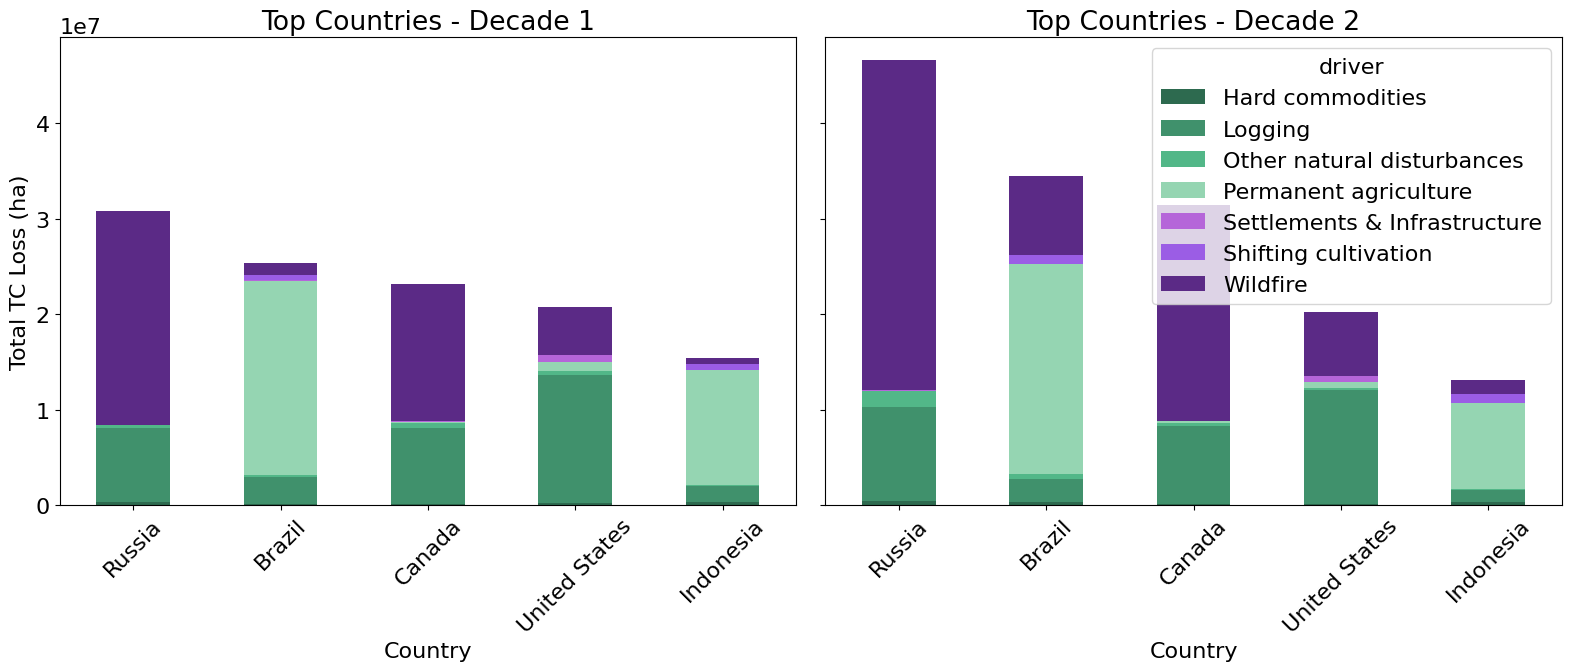

In [111]:
# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Decade 1
plot_df1.plot(
    kind="bar",
    stacked=True,
    ax=axes[0],
    title="Top Countries - Decade 1",
    legend=False,  # Hide duplicate legend
    color=categorical_colors
)

# Decade 2
plot_df2.plot(
    kind="bar",
    stacked=True,
    ax=axes[1],
    title="Top Countries - Decade 2",
    color=categorical_colors
)

# Improve layout
for ax in axes:
    ax.set_xlabel("Country")
    ax.set_ylabel("Total TC Loss (ha)")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

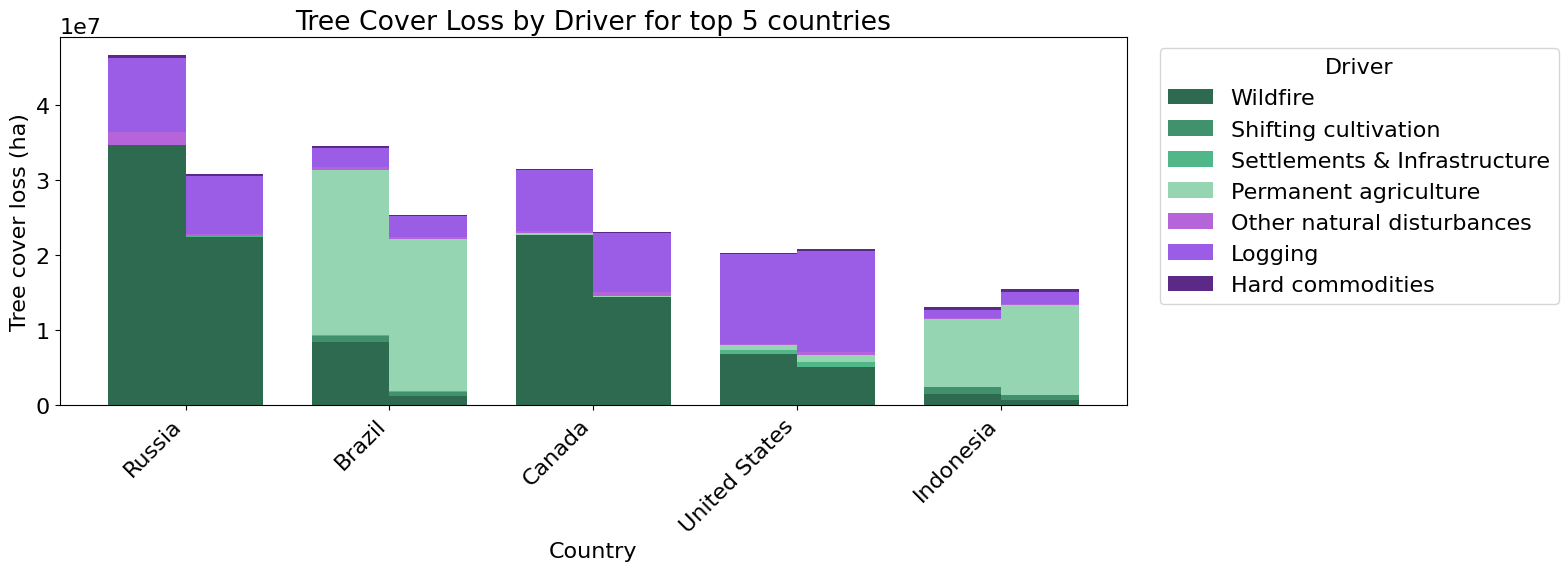

In [99]:
# ---- Plot side-by-side stacked bars ---- 
x = np.arange(len(order)) 
bar_w = 0.38 

fig, ax = plt.subplots(figsize=(16, 6)) 
bottom1 = np.zeros(len(order)) 
bottom2 = np.zeros(len(order)) 

for d in drivers:
    y1 = plot_df2[d].fillna(0).values ###!!! this is the issue there are NaN values
    y2 = plot_df1[d].fillna(0).values ###!!! this is the issue there are NaN values

    ax.bar(x - bar_w/2, y1, bar_w, bottom=bottom1, color=driver_to_color[d], label=d)
    ax.bar(x + bar_w/2, y2, bar_w, bottom=bottom2, color=driver_to_color[d])

    bottom1 += y1
    bottom2 += y2

# ---- Axis labels, ticks, legend ---- 
ax.set_xticks(x) 
ax.set_xticklabels(order, rotation=45, ha="right") 
ax.set_ylabel("Tree cover loss (ha)") 
ax.set_title("Tree Cover Loss by Driver for top 5 countries") 
ax.set_xlabel("Country") 

# Only one legend (drivers) — use unique handles  
handles, labels = ax.get_legend_handles_labels() 
by_label = dict(zip(labels, handles)) 
ax.legend(by_label.values(), by_label.keys(), title="Driver", bbox_to_anchor=(1.02, 1), loc="upper left") 

plt.tight_layout() 
plt.show()

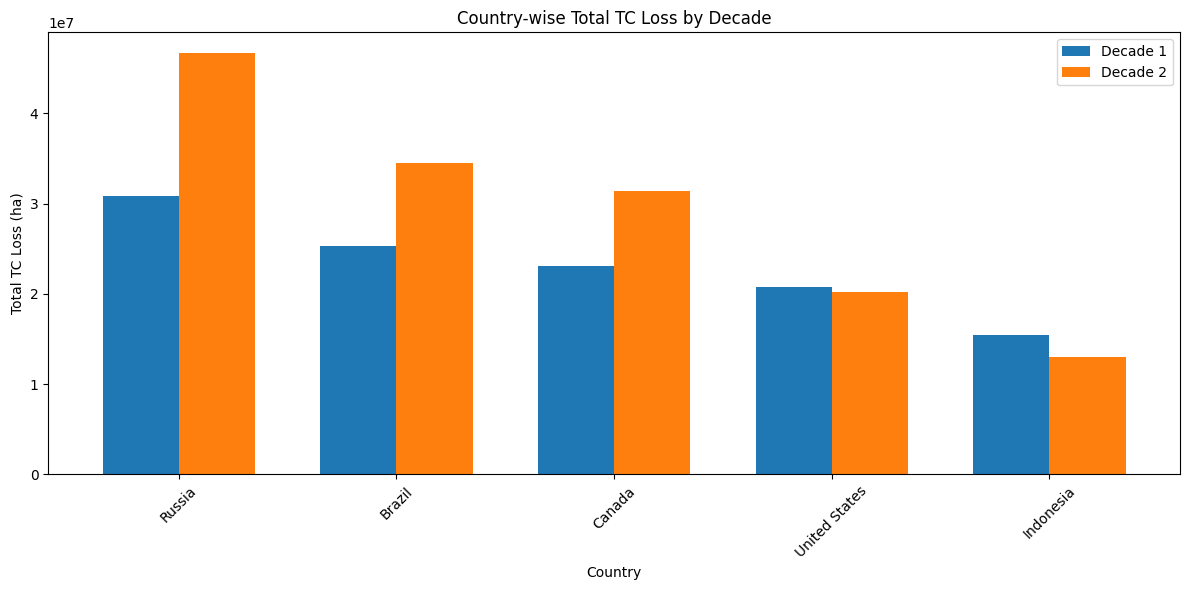

In [167]:
# Sum across drivers to get total tc_loss_ha per country for each decade
decade1_totals = plot_df2.sum(axis=1)
decade2_totals = plot_df1.sum(axis=1)

# STEP 2: Combine into one dataframe
combined_df = pd.DataFrame({
    "Decade 1": decade1_totals,
    "Decade 2": decade2_totals
}).fillna(0)  # in case some countries are missing in one decade

# Optional: sort by total loss
combined_df["Total"] = combined_df["Decade 1"] + combined_df["Decade 2"]
combined_df = combined_df.sort_values(by="Total", ascending=False).drop(columns="Total")

# STEP 3: Plot grouped bar chart
ax = combined_df.plot(
    kind="bar",
    figsize=(12, 6),
    width=0.7  # control bar width
)

ax.set_ylabel("Total TC Loss (ha)")
ax.set_xlabel("Country")
ax.set_title("Country-wise Total TC Loss by Decade")
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

-- Insights
- From both bar plots we show the average of tree_cover_loss between two decades: From (1) 2014-2024 and  (2) 2001-2013
- For both decades we have the same highest coutries contrbuting t the loss
- For both decades we have skewed distributions (midian < mean>)
- There is a shift towards higher values in the ditribution of tc-loss
- Oveall Wildfire and permanent agriculture are the prominent drivers

In [113]:
### Prepare to visualize the difference between the tc-loss for these decades

loss_decades = pd.concat([avg_loss_country_decade1, avg_loss_country_decade2['tc_loss_ha']], axis=1)
loss_decades.columns = ['country', '2005-2014', '2015-2024']

loss_decades['tc_loss_diff'] = (loss_decades['2015-2024']-loss_decades['2005-2014'])/loss_decades['2005-2014']
loss_decades

### mitigation efforts

,country,2005-2014,2015-2024,tc_loss_diff
0,Afghanistan,92.2,16.571429,-0.820267
1,Albania,2414.2,1413.600000,-0.414464
2,Algeria,7118.8,14498.300000,1.036621
3,Angola,146834.5,244973.800000,0.668367
4,Argentina,399919.5,200938.900000,-0.497552
...,...,...,...,...
149,Vietnam,133918.3,212882.100000,0.589642
150,"Virgin Islands, U.S.",35.9,129.300000,2.601671
151,Zambia,89003.2,162090.100000,0.821172
152,Zimbabwe,10825.6,10181.200000,-0.059526


### Map to visualize tc_loss_diff

In [101]:
# 1. LOAD WORLD GEOMETRY
# Load Natural Earth world data
world = gpd.read_file(
     "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_map_subunits.zip"
)

print(f"World GeoDataFrame shape: {world.shape}")
print(f"World columns: {world.columns.tolist()}")

World GeoDataFrame shape: (360, 169)
World columns: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A

In [106]:
# 2. COUNTRY NAME MAPPING
data_countries = set(loss_decades["country"].dropna().unique())
map_countries  = set(world["ADMIN"].dropna().unique())

missing = sorted(data_countries - map_countries)

# Updated name_fix with correct Natural Earth 10m subunit names
name_fix = {
    # Accent/punctuation fixes
    "México": "Mexico",
    
    # Political name changes
    "Côte d'Ivoire": "Ivory Coast",
    "United States": "United States of America",
    "Swaziland": "eSwatini",
    "Tanzania": "United Republic of Tanzania",
    "Timor-Leste": "East Timor",
    "Serbia": "Republic of Serbia",
    
    # French territories (exact names in NE 10m subunits)
    "French Guiana": "France",
    "Guadeloupe": "France",
    "Martinique": "France",
    "Réunion": "France",
    
    # US territories
    "Virgin Islands, U.S.": "United States Virgin Islands",  # Full name
    
    # Nordic territories
    "Åland": "Aland",  # Remove accent: Å → A
}

loss_decades["country_mapped"] = loss_decades["country"].replace(name_fix)

####
# Aggregate duplicates by taking mean
loss_decades_clean = loss_decades.groupby('country_mapped').agg({
    '2005-2014': 'mean',
    '2015-2024': 'mean', 
    'tc_loss_diff': 'mean'
}).reset_index()

###

# Check which countries will match
matched = loss_decades['country_mapped'].isin(world['ADMIN'])
print(f"\nCountries that will match: {matched.sum()} / {len(loss_decades)}")

# Show unmatched countries
unmatched = loss_decades[~matched]['country'].tolist()
if unmatched:
    print(f"\n Unmatched countries ({len(unmatched)}):")
    for country in unmatched[:20]:
        print(f"  - {country}")


Countries that will match: 154 / 154


In [107]:
# 4. MERGE DATA WITH GEOMETRY
# Merge with world geometries

world_data = world.merge(
    loss_decades_clean,
    left_on='ADMIN',
    right_on='country_mapped',
    how='left'
)

print(f"\nMerge results:")
print(f"Total countries in map: {len(world_data)}")
print(f"Countries with data: {world_data['tc_loss_diff'].notna().sum()}")
print(f"Countries without data: {world_data['tc_loss_diff'].isna().sum()}")


Merge results:
Total countries in map: 360
Countries with data: 223
Countries without data: 137


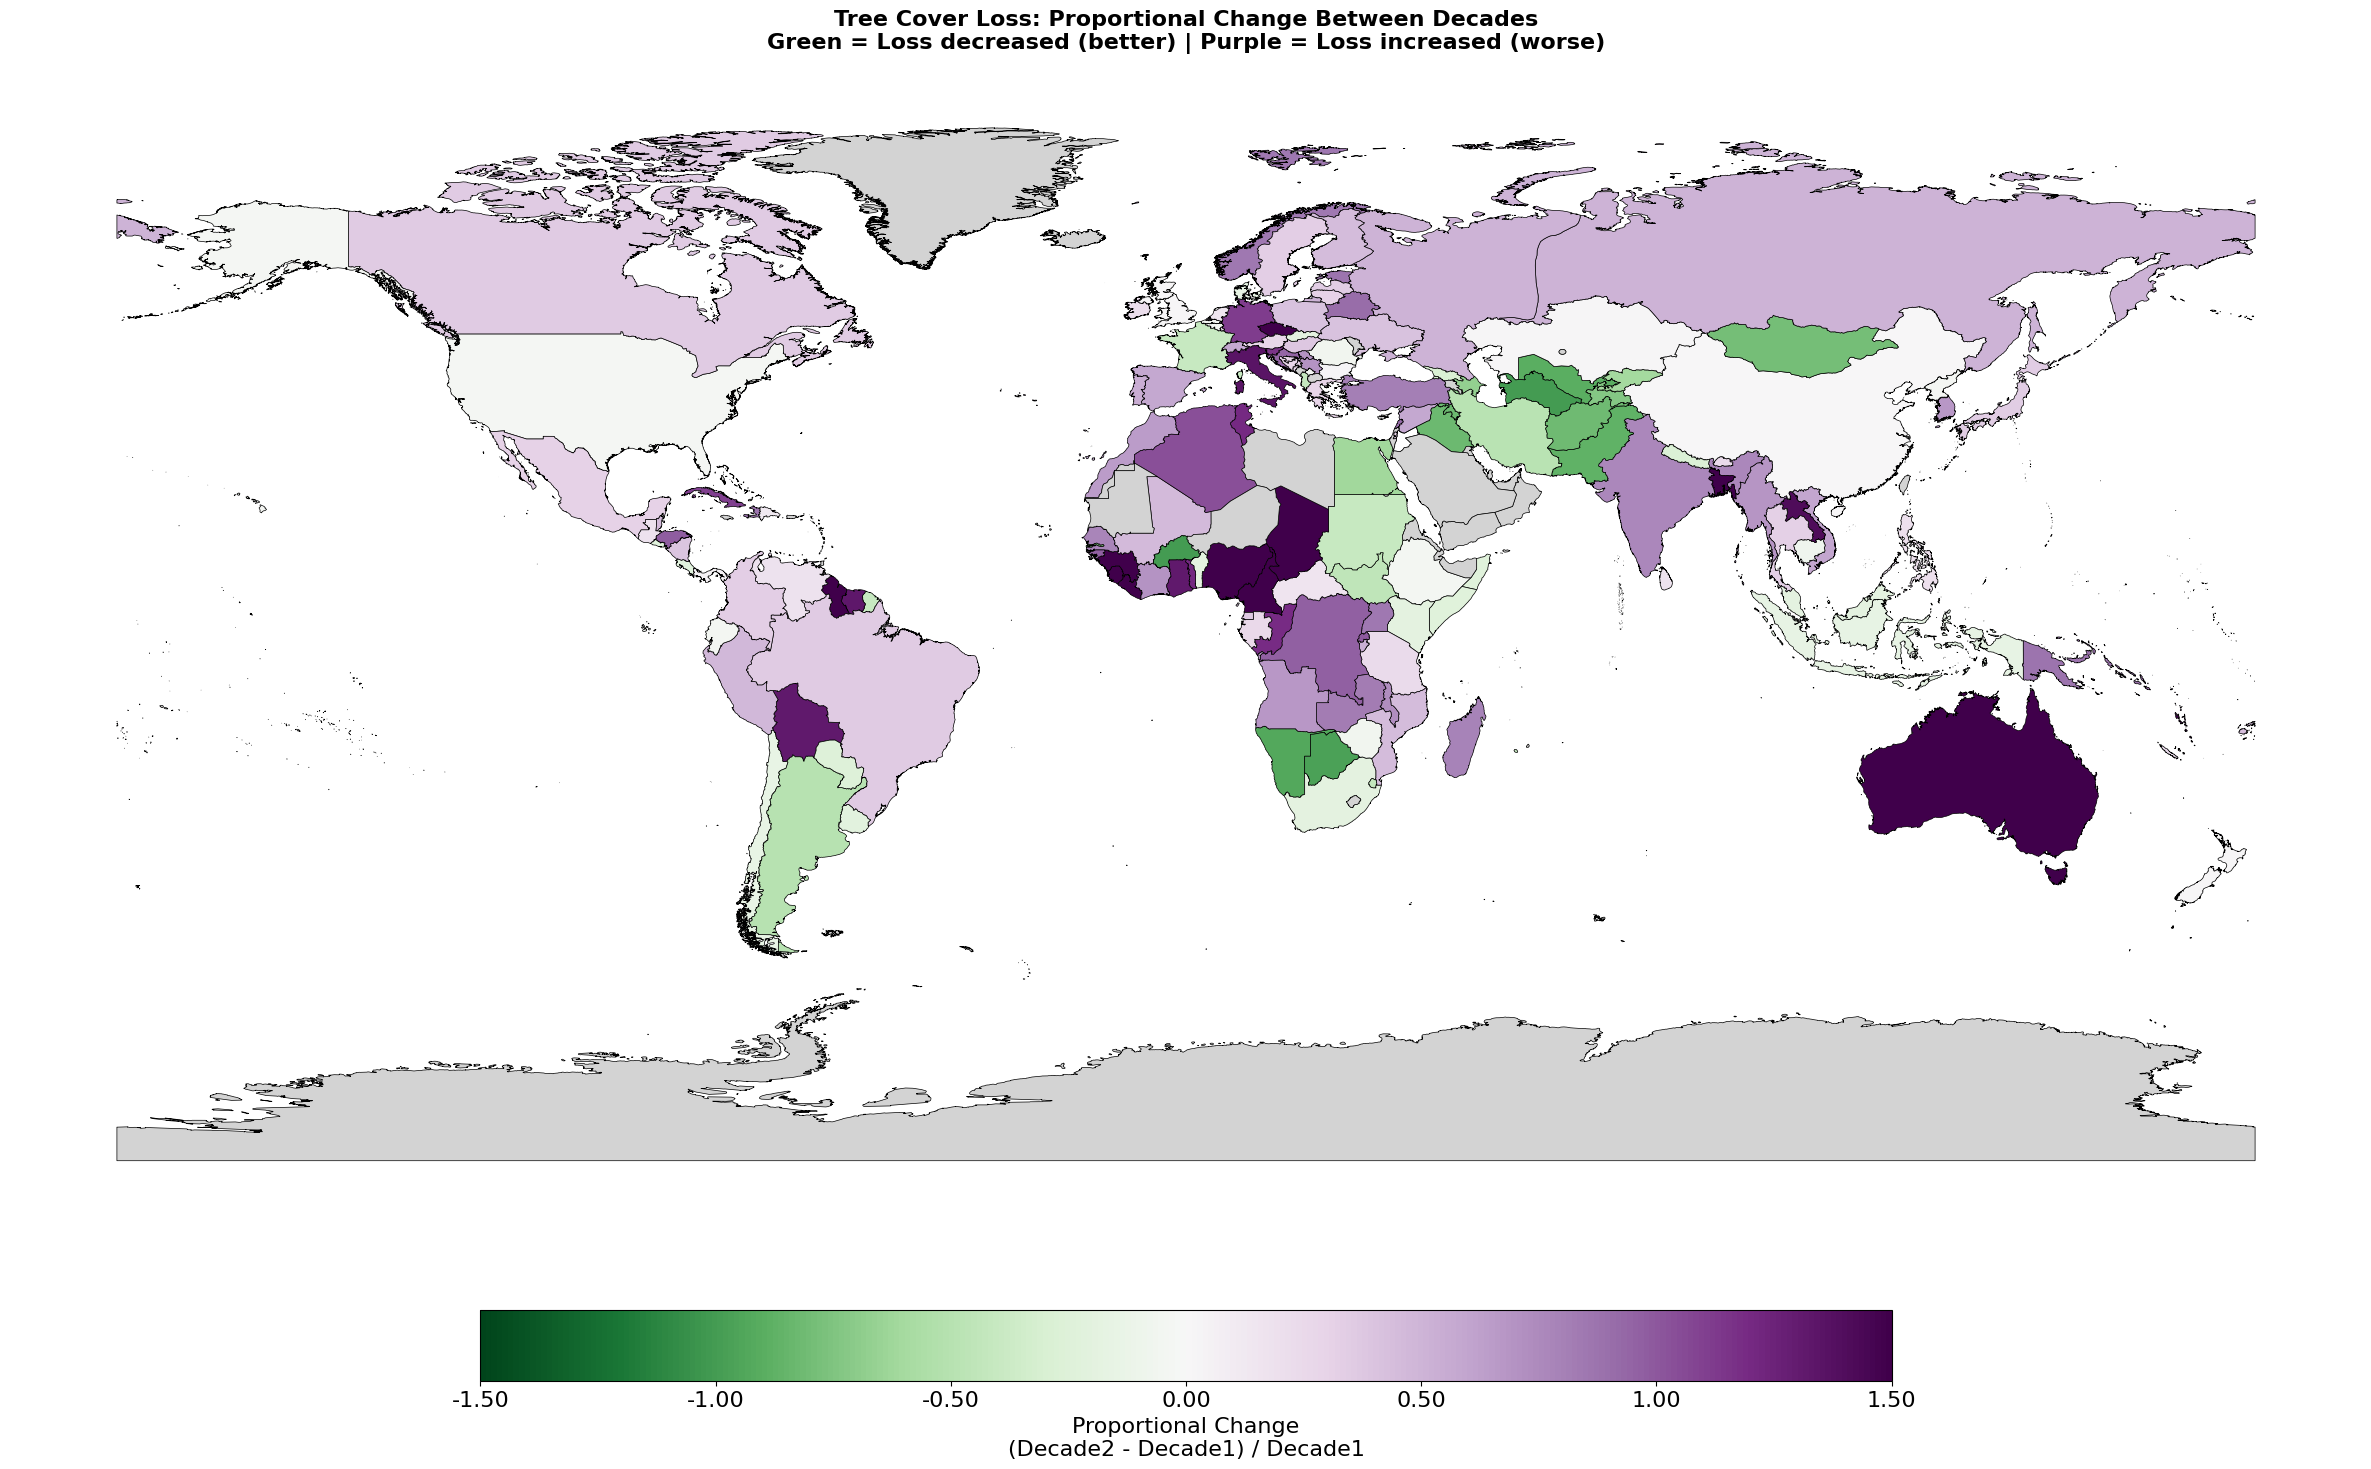

In [108]:
# 5. CREATE STATIC CHOROPLETH MAPS: tc_loss_diff (Proportional Change)
fig, ax1 = plt.subplots(1, 1, figsize=(24, 20))

world_data.plot(
    column='tc_loss_diff',
    cmap='PRGn_r',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax1,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'},
    legend_kwds={
        'label': 'Proportional Change\n(Decade2 - Decade1) / Decade1',
        'orientation': 'horizontal',
        'shrink': 0.6,
        'pad': 0.05,
        'format': '%.2f'
    },
    vmin=-1.5,
    vmax=1.5
)

ax1.set_title('Tree Cover Loss: Proportional Change Between Decades\n' + 
              'Green = Loss decreased (better) | Purple = Loss increased (worse)',
              fontsize=16, fontweight='bold', pad=20)
ax1.axis('off')

plt.tight_layout()
plt.show()

### Distribution of average tc-loss across countries for the two decades

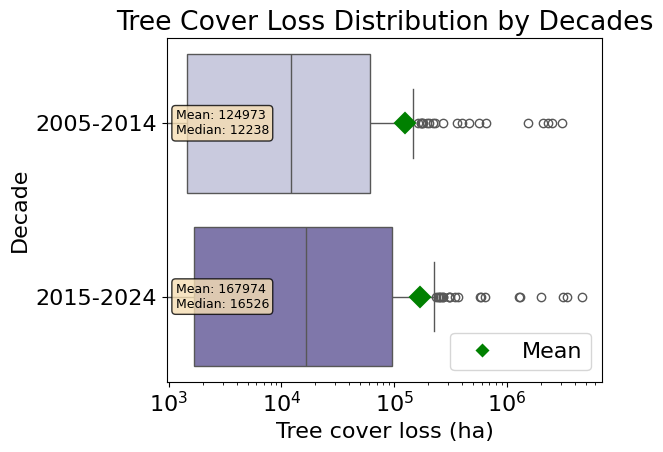

In [109]:
df_long = loss_decades.melt(
        value_vars= ['2005-2014', '2015-2024'],
        var_name="Decade",
        value_name="Tree cover loss (ha)"
    )

ax = sns.boxplot(
    data=df_long,
    x="Tree cover loss (ha)",
    y="Decade",
    palette="Purples"
)

# Add mean markers
means = df_long.groupby('Decade')['Tree cover loss (ha)'].mean()
medians = df_long.groupby('Decade')['Tree cover loss (ha)'].median()

for pos, (decade, mean_val) in enumerate(means.items()):
    median_val = medians[decade]
    
    # Plot mean
    ax.plot(mean_val, pos, marker='D', color='green', markersize=10, 
            markeredgewidth=1.5, zorder=3)
    
    # Add text box with statistics
    textstr = f'Mean: {mean_val:.0f}\nMedian: {median_val:.0f}'
    ax.text(0.02, pos, textstr, transform=ax.get_yaxis_transform(),
            fontsize=9, verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.xscale("log")
plt.xlabel("Tree cover loss (ha)")
plt.title("Tree Cover Loss Distribution by Decades")

# Add legend for mean marker
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='D', color='w', 
                         markerfacecolor='green',
                         markersize=8, label='Mean')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()